In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress

In [2]:
#path = "../Reources/Crash_Statistics_Victoria_clean.csv" 
crash_data = pd.read_csv("Resources/Crash_Statistics_Victoria_clean.csv")
crash_data.head()

,OBJECTID,ACCIDENT_DATE,ACCIDENT_TIME,ALCOHOLTIME,ACCIDENT_TYPE,DAY_OF_WEEK,LIGHT_CONDITION,ROAD_GEOMETRY,SEVERITY,SPEED_ZONE,...,YOUNG_DRIVER,ALCOHOL_RELATED,UNLICENCSED,NO_OF_VEHICLES,HEAVYVEHICLE,PASSENGERVEHICLE,MOTORCYCLE,PUBLICVEHICLE,RMA,STAT_DIV_NAME
0,3402184,15/07/2013,09.00.00,No,Collision with vehicle,Monday,Day,Cross intersection,Serious injury accident,50 km/hr,...,0,No,0,2,0,2,0,0,Arterial Highway,Country
1,3402219,19/07/2013,12.40.00,No,Collision with a fixed object,Friday,Day,Not at intersection,Serious injury accident,50 km/hr,...,0,No,0,1,0,1,0,0,Local Road,Country
2,3404429,19/08/2013,18.55.00,Yes,Collision with a fixed object,Sunday,Dark Street lights on,Cross intersection,Serious injury accident,60 km/hr,...,0,No,0,1,0,1,0,0,Arterial Highway,Country
3,3404496,26/08/2013,09.45.00,No,Vehicle overturned (no collision),Monday,Day,Not at intersection,Serious injury accident,100 km/hr,...,0,No,0,2,0,2,0,0,Local Road,Country
4,3404960,23/10/2013,16.15.00,No,No collision and no object struck,Wednesday,Day,Not at intersection,Other injury accident,Not known,...,0,No,0,1,0,0,1,0,Local Road,Country


In [3]:
#check dimensions
crash_data.shape

(65435, 47)

In [4]:
#check missing values
crash_data.isnull().sum()

OBJECTID                0
ACCIDENT_DATE           0
ACCIDENT_TIME           0
ALCOHOLTIME             0
ACCIDENT_TYPE           0
DAY_OF_WEEK          1146
LIGHT_CONDITION         0
ROAD_GEOMETRY           0
SEVERITY                0
SPEED_ZONE              0
NODE_ID                 0
LONGITUDE               0
LATITUDE                0
NODE_TYPE               6
LGA_NAME                0
REGION_NAME             0
VICGRID_X               0
VICGRID_Y               0
TOTAL_PERSONS           0
INJ_OR_FATAL            0
FATALITY                0
SERIOUSINJURY           0
OTHERINJURY             0
NONINJURED              0
MALES                   0
FEMALES                 0
BICYCLIST               0
PASSENGER               0
DRIVER                  0
PEDESTRIAN              0
PILLION                 0
MOTORIST                0
UNKNOWN                 0
PED_CYCLIST_5_12        0
PED_CYCLIST_13_18       0
OLD_PEDESTRIAN          0
OLD_DRIVER              0
YOUNG_DRIVER            0
ALCOHOL_RELA

In [5]:
#remove NA values based on row
crash_data = crash_data.dropna(axis = 0)

In [6]:
#check missing values
crash_data.isnull().sum()


OBJECTID             0
ACCIDENT_DATE        0
ACCIDENT_TIME        0
ALCOHOLTIME          0
ACCIDENT_TYPE        0
DAY_OF_WEEK          0
LIGHT_CONDITION      0
ROAD_GEOMETRY        0
SEVERITY             0
SPEED_ZONE           0
NODE_ID              0
LONGITUDE            0
LATITUDE             0
NODE_TYPE            0
LGA_NAME             0
REGION_NAME          0
VICGRID_X            0
VICGRID_Y            0
TOTAL_PERSONS        0
INJ_OR_FATAL         0
FATALITY             0
SERIOUSINJURY        0
OTHERINJURY          0
NONINJURED           0
MALES                0
FEMALES              0
BICYCLIST            0
PASSENGER            0
DRIVER               0
PEDESTRIAN           0
PILLION              0
MOTORIST             0
UNKNOWN              0
PED_CYCLIST_5_12     0
PED_CYCLIST_13_18    0
OLD_PEDESTRIAN       0
OLD_DRIVER           0
YOUNG_DRIVER         0
ALCOHOL_RELATED      0
UNLICENCSED          0
NO_OF_VEHICLES       0
HEAVYVEHICLE         0
PASSENGERVEHICLE     0
MOTORCYCLE 

In [7]:
#check data dimensions
crash_data.shape

(63037, 47)

In [8]:
crash_data.sample(10)

,OBJECTID,ACCIDENT_DATE,ACCIDENT_TIME,ALCOHOLTIME,ACCIDENT_TYPE,DAY_OF_WEEK,LIGHT_CONDITION,ROAD_GEOMETRY,SEVERITY,SPEED_ZONE,...,YOUNG_DRIVER,ALCOHOL_RELATED,UNLICENCSED,NO_OF_VEHICLES,HEAVYVEHICLE,PASSENGERVEHICLE,MOTORCYCLE,PUBLICVEHICLE,RMA,STAT_DIV_NAME
45781,3415639,3/02/2014,09.00.00,No,Collision with vehicle,Monday,Day,Not at intersection,Other injury accident,60 km/hr,...,0,No,0,3,0,3,0,0,Arterial Other,Metro
32727,3413261,14/06/2014,06.50.00,Yes,Collision with a fixed object,Saturday,Dusk/Dawn,Not at intersection,Serious injury accident,70 km/hr,...,0,No,0,1,0,1,0,0,Arterial Other,Metro
23039,3417693,14/08/2014,11.48.00,No,Struck Pedestrian,Thursday,Day,T intersection,Other injury accident,40 km/hr,...,0,No,0,1,0,1,0,0,Local Road,Metro
53923,3430554,17/07/2015,10.53.00,No,Collision with vehicle,Friday,Day,Not at intersection,Other injury accident,60 km/hr,...,0,No,0,2,0,2,0,0,Arterial Other,Metro
17474,3430577,5/07/2015,23.23.00,Yes,Collision with vehicle,Sunday,Dark Street lights on,Cross intersection,Other injury accident,70 km/hr,...,1,No,0,4,0,4,0,0,Arterial Highway,Metro
35538,3462819,25/12/2017,16.24.00,Yes,Collision with vehicle,Sunday,Day,Not at intersection,Serious injury accident,60 km/hr,...,1,No,0,3,0,3,0,0,Local Road,Metro
33808,3408921,30/01/2014,13.35.00,No,Collision with vehicle,Thursday,Day,T intersection,Other injury accident,60 km/hr,...,0,No,0,3,0,3,0,0,Local Road,Metro
59554,3446742,29/08/2016,15.30.00,No,Collision with vehicle,Monday,Day,Not at intersection,Serious injury accident,50 km/hr,...,0,No,0,2,0,1,0,0,Local Road,Metro
42340,3415611,13/06/2014,08.00.00,No,Collision with vehicle,Friday,Dusk/Dawn,T intersection,Serious injury accident,80 km/hr,...,1,No,0,2,1,1,0,0,Arterial Highway,Metro
3768,3410668,27/02/2014,10.33.00,No,Struck Pedestrian,Thursday,Day,Cross intersection,Other injury accident,50 km/hr,...,0,No,0,1,0,1,0,0,Local Road,Metro


In [9]:
#load local government expenditure data, skip first row
localgov = pd.read_csv("Resources/lge_cleanfile.csv", skiprows = 1)
localgov.head(10)

,LGA_NAME,Local Roads - Sealed-length,Local Roads - Unsealed - Formed & Sheeted-length,Local Roads - Unsealed - Natural Surface_length,Total_roadlength,Local Roads - Sealed-expenditure,Local Roads - Unsealed - Formed & Sheeted-expenditure,Local Roads - Unsealed - Natural Surface-expenditure,Roads Ancillary-expenditure,Total-expenditure
0,Alpine,412.0,233.0,215.0,860.0,3748129.0,265116.0,0.0,0.0,4013244.0
1,Ararat,764.0,1420.0,240.0,2424.0,7303459.0,2975868.0,2281.0,1361455.0,11845829.0
2,Ballarat,1044.0,351.0,40.0,1435.0,41874084.0,3196942.0,363289.0,1045194.0,46775611.0
3,Banyule,538.0,6.0,1.0,545.0,10329600.0,0.0,0.0,0.0,10329600.0
4,Bass Coast,563.0,373.0,7.0,943.0,7355926.0,1677983.0,0.0,789457.0,9923525.0
5,Baw Baw,1110.0,721.0,184.0,2015.0,13512590.0,3092182.0,0.0,1493686.0,19073493.0
6,Bayside,355.0,1.0,0.0,356.0,5547236.0,0.0,0.0,6045707.0,11592943.0
7,Benalla,560.0,713.0,78.0,1351.0,2504772.0,1474785.0,0.0,0.0,3979557.0
8,Boroondara,562.0,0.0,0.0,562.0,11436082.0,0.0,0.0,0.0,11436082.0
9,Brimbank,889.0,5.0,0.0,894.0,25715082.0,344474.0,0.0,1997635.0,28078056.0


In [10]:
#check dimensions
localgov.shape

(79, 10)

In [11]:
#check null values
localgov.isnull().sum()

LGA_NAME                                                  0
Local Roads - Sealed-length                               0
Local Roads - Unsealed - Formed &  Sheeted-length         0
Local Roads - Unsealed - Natural Surface_length           0
Total_roadlength                                          0
Local Roads - Sealed-expenditure                          0
Local Roads - Unsealed - Formed &  Sheeted-expenditure    0
Local Roads - Unsealed - Natural Surface-expenditure      0
Roads Ancillary-expenditure                               0
Total-expenditure                                         0
dtype: int64

In [12]:
#unique lGA names on crash dataset
crash_data["LGA_NAME"].nunique()


79

In [13]:
#unique lGA names on local gov dataset
localgov["LGA_NAME"].nunique()


79

In [14]:
localgov.dtypes

LGA_NAME                                                   object
Local Roads - Sealed-length                               float64
Local Roads - Unsealed - Formed &  Sheeted-length         float64
Local Roads - Unsealed - Natural Surface_length           float64
Total_roadlength                                          float64
Local Roads - Sealed-expenditure                          float64
Local Roads - Unsealed - Formed &  Sheeted-expenditure    float64
Local Roads - Unsealed - Natural Surface-expenditure      float64
Roads Ancillary-expenditure                               float64
Total-expenditure                                         float64
dtype: object

In [15]:
localgov["Expense_per_km"] = localgov["Total-expenditure"] / localgov["Total_roadlength"]  
localgov.head()

,LGA_NAME,Local Roads - Sealed-length,Local Roads - Unsealed - Formed & Sheeted-length,Local Roads - Unsealed - Natural Surface_length,Total_roadlength,Local Roads - Sealed-expenditure,Local Roads - Unsealed - Formed & Sheeted-expenditure,Local Roads - Unsealed - Natural Surface-expenditure,Roads Ancillary-expenditure,Total-expenditure,Expense_per_km
0,Alpine,412.0,233.0,215.0,860.0,3748129.0,265116.0,0.0,0.0,4013244.0,4666.562791
1,Ararat,764.0,1420.0,240.0,2424.0,7303459.0,2975868.0,2281.0,1361455.0,11845829.0,4886.893152
2,Ballarat,1044.0,351.0,40.0,1435.0,41874084.0,3196942.0,363289.0,1045194.0,46775611.0,32596.244599
3,Banyule,538.0,6.0,1.0,545.0,10329600.0,0.0,0.0,0.0,10329600.0,18953.394495
4,Bass Coast,563.0,373.0,7.0,943.0,7355926.0,1677983.0,0.0,789457.0,9923525.0,10523.356310


In [16]:
LGA_list = localgov["LGA_NAME"]
LGA_list

0           Alpine 
1           Ararat 
2         Ballarat 
3          Banyule 
4       Bass Coast 
          ...      
74         Wodonga 
75         Wyndham 
76           Yarra 
77    Yarra Ranges 
78    Yarriambiack 
Name: LGA_NAME, Length: 79, dtype: object

In [17]:
print(type(LGA_list))

<class 'pandas.core.series.Series'>


In [18]:
#df.groupby('Company Name')['Amount'].agg(['sum','count'])
num_accident_perLGA= crash_data.groupby('LGA_NAME')['OBJECTID'].agg('count').reset_index()
num_accident_perLGA

,LGA_NAME,OBJECTID
0,ALPINE,227
1,ARARAT,150
2,BALLARAT,1134
3,BANYULE,909
4,BASS COAST,340
...,...,...
74,WODONGA,267
75,WYNDHAM,1385
76,YARRA,1564
77,YARRA RANGES,1860


In [19]:
print(type(num_accident_perLGA))

<class 'pandas.core.frame.DataFrame'>


In [20]:
expense_per_km = localgov["Expense_per_km"]
expense_per_km

0      4666.562791
1      4886.893152
2     32596.244599
3     18953.394495
4     10523.356310
          ...     
74    10772.434263
75    21490.417843
76    51328.703704
77    23913.816990
78     1764.535159
Name: Expense_per_km, Length: 79, dtype: float64

In [21]:
print(type(expense_per_km))

<class 'pandas.core.series.Series'>


In [28]:
#expense_per_km = pd.Series(expense_per_km)
lga_stats = pd.concat([ num_accident_perLGA, expense_per_km], axis = 1).head(10)
lga_stats 


,LGA_NAME,OBJECTID,Expense_per_km
0,ALPINE,227,4666.562791
1,ARARAT,150,4886.893152
2,BALLARAT,1134,32596.244599
3,BANYULE,909,18953.394495
4,BASS COAST,340,10523.356310
5,BAW BAW,780,9465.753350
6,BAYSIDE,799,32564.446629
7,BENALLA,192,2945.638046
8,BENDIGO,1282,20348.900356
9,BOROONDARA,1440,31407.221477


In [23]:
lga_stats.shape

(79, 4)

In [31]:
#calculate correlation coffecient
round(st.pearsonr(lga_stats["Expense_per_km"],lga_stats["OBJECTID"])[0],2)

0.83

In [32]:
x_values = lga_stats["Expense_per_km"]
y_values = lga_stats["OBJECTID"] 

In [33]:
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
print("slope", slope)
print("intercept", intercept)
print(x_values * slope + intercept)

slope 0.032799268331427135
intercept 173.09672950593108
0     326.156575
1     333.383249
2    1242.229703
3     794.754201
4     518.255117
5     483.566514
6    1241.186753
7     269.711502
8     840.525773
9    1203.230614
Name: Expense_per_km, dtype: float64


In [34]:
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(line_eq)

y = 0.03x + 173.1


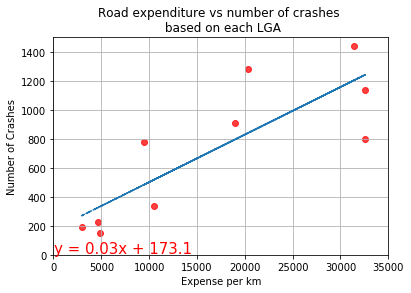

In [50]:
plt.scatter(x_values,y_values, facecolors = "red", alpha = 0.75)
plt.plot(x_values,regress_values,"--")

plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Expense per km')
plt.ylabel('Number of Crashes')
plt.title("Road expenditure vs number of crashes \n based on each LGA")
plt.xlim(0,35000)
plt.ylim(0,1500)
plt.grid()
plt.show()